# Gráfico de Pastel

Un gráfico de pastel es un elemento circular que representa sólo una serie de datos. El área del gráfico representa el porcentaje de cada uno de los datos. Normalmente los gráficos de pastel se utilizan en negocios para representar operaciones como ventas, resultados de cuestionarios etc. Principalmente porque dan un resumen rápido.

Obviamente con Matplolib se pueden hacer gráficos de pastel utilizando la función
`pie()`



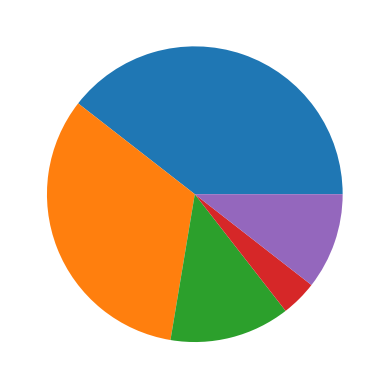

In [1]:
# Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Inventar algunos datos
labels = 'Michis', 'Lomitos', 'Tlacuaches', 'Ajolotes', 'Cacomixtles'
sizes = [30, 25, 10, 3,8 ]


# Hacer el plot
fig, ax = plt.subplots()
plt.pie(sizes);

In [2]:
# Noten algo, cada una de las partes del plot tiene una cuña que indica el valor
# de cada uno de los elementos.

# Por default, la primer marca empieza desde el eje x y se mueve en contra de las
# manecillas del reloj


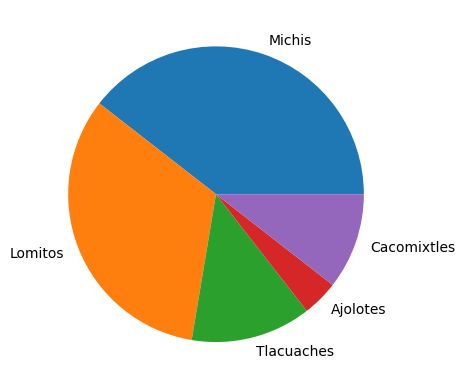

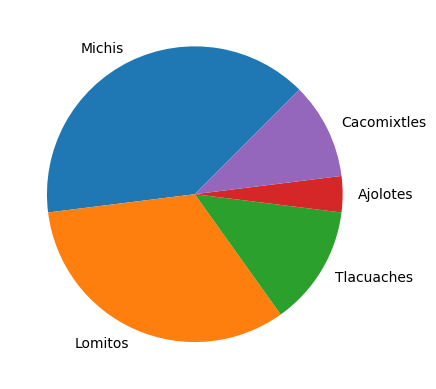

In [3]:
# Vamos mejorando el código, agregando labels
fig, ax = plt.subplots()
plt.pie(sizes, labels = labels);

# Cambiemos el ángulo en el que empieza el primer elemento
# Por default empieza en 0°
fig, ax = plt.subplots()
plt.pie(sizes, labels = labels, startangle = 45);

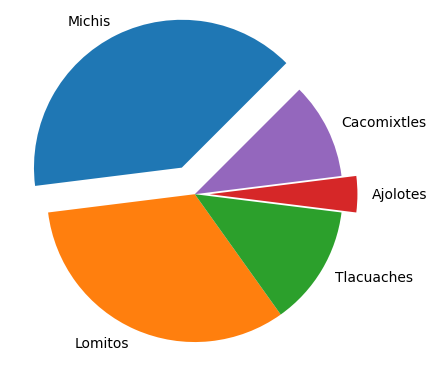

In [4]:
# Qué pasa si queremos resaltar un valor?

exp = [0.2, 0.0, 0.0, 0.1, 0.0] # El valor que pongan indica qué tan lejos del centro va a estar

fig, ax = plt.subplots()
plt.pie(sizes, labels = labels, startangle = 45, explode = exp);

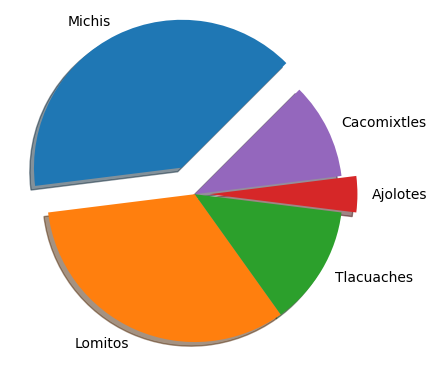

In [5]:
# Tambien se puede agregar un efecto de sombra

fig, ax = plt.subplots()
plt.pie(sizes, labels = labels, startangle = 45, explode = exp, shadow = True);

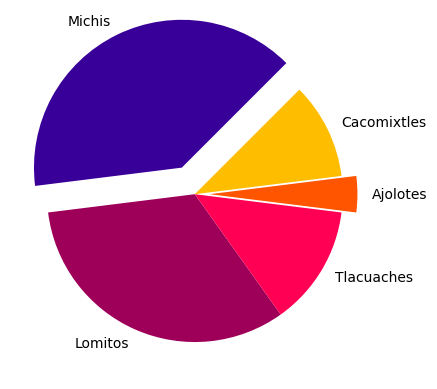

In [6]:
# Obviamente también se puede cambiar los colores

# Vector de colores
colours = ['#390099', '#9e0059','#ff0054','#ff5400','#ffbd00']

fig, ax = plt.subplots()
plt.pie(sizes, labels = labels, startangle = 45, explode = exp, colors = colours);

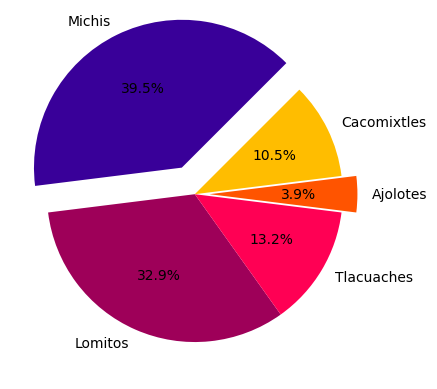

In [11]:
# Pueden también integrar los valores porcentuales

fig, ax = plt.subplots()
plt.pie(sizes, labels = labels, startangle = 45, explode = exp, colors = colours, autopct = '%1.1f%%');


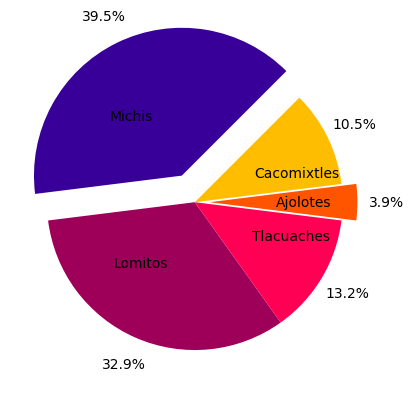

In [19]:
fig, ax = plt.subplots()
plt.pie(sizes, labels = labels, startangle = 45, explode = exp, colors = colours, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 0.45); #que tan lejos
                                                                                                                                                 #están los labels

Recuerden que los gráficos de pastel siempre van a representar una proporción de algo. Así que deben asegurarse que tenga sentido lo que están presentando.

Vamos a hacer un ejercicio para ver esto

In [22]:
# Ya se lo saben, importar las librerías
# *_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar los datos, son de emisiondes de CO2

url = 'https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/co2_state_2016_sector.xlsx'

data = pd.read_excel(url)
data.set_index('State', inplace = True) #cambia el index por nombres q yo quiera
                                        #inplace reemplaza el index por state
# *_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

print(data.head())

            Commercial  Electric Power  Residential  Industrial  \
State                                                             
Alabama           2.22           55.25         1.87       21.06   
Alaska            2.03            2.75         1.50       16.78   
Arizona           2.87           44.28         2.19        4.59   
Arkansas          2.94           30.22         1.66        8.21   
California       18.87           36.57        24.11       68.84   

            Transportation   Total  
State                               
Alabama              34.69  115.09  
Alaska               11.85   34.91  
Arizona              33.08   87.01  
Arkansas             19.38   62.41  
California          212.95  361.35  


In [23]:
# Supongamos que solamente queremos analizar un estado en particular, i.e. California

Cal_data = data.loc['California']

# Pero para hacer nuestro gráfico no queremos el Total, porque estaríamos siendo redundantes
Cal_data = Cal_data['Commercial':'Transportation']


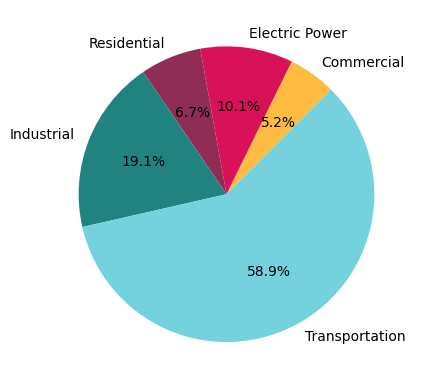

In [24]:
# Ahora vamos entonces a hacer el gráfico para ver los datos
colours = ['#ffbc42', '#d81159','#8f2d56','#218380','#73d2de']

fig, ax = plt.subplots()
plt.pie(Cal_data, labels = Cal_data.index, startangle = 45, colors = colours, autopct = '%1.1f%%');


Tengan MUCHO cuidado con los datos que trabajan, si por ejemplo no hubieran quitado la columna de "Total" el gráfico hubiera quedado así

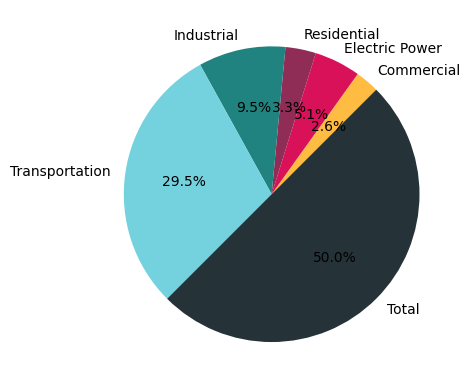

In [25]:
Cal_data = data.loc['California']
colours = ['#ffbc42', '#d81159','#8f2d56','#218380','#73d2de', "#253237"]

fig, ax = plt.subplots()
plt.pie(Cal_data, labels = Cal_data.index, startangle = 45, colors = colours, autopct = '%1.1f%%');


Bueno si bien un gráfico puede ser de ayuda, qué pasa entonces si queremos ver alguna comparación. En ese caso entonces tendríamos que hacer diferentes gráficos para diferentes estados.

            Commercial  Electric Power  Residential  Industrial  \
State                                                             
California       18.87           36.57        24.11       68.84   
Georgia           4.59           57.48         6.84       13.29   

            Transportation  
State                       
California          212.95  
Georgia              54.04  


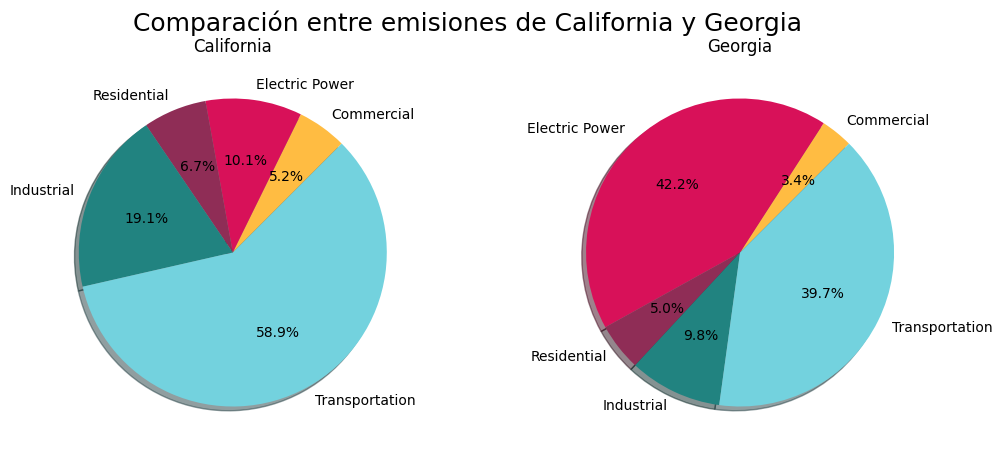

In [54]:
# Veamos de nuevo los datos

# Tomemos dos estados por ejemplo California y Georgia
new_df = data.loc[['California', 'Georgia']]
new_df.drop(['Total'], axis = 'columns', inplace = True) # Qué hace el inplace???



# Básicamente es hacer una copia de el df
# df = df.operacion(inplace=False) esto genera un nuevo dataframe.


# Ahora vamos a plotear las diferencias entre ellos
colours = ['#ffbc42', '#d81159','#8f2d56','#218380','#73d2de']

                                                 #ancho y largo
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5)) # Aquí vamos a definir el tamaño de la figura y cuántos gráficos van a haber
for ii, ax in enumerate(axs.flatten()): # Digamos que aqui se iteran los ejes de cada subplot
  plt.sca(ax) # Esto le indica al ciclo que en ese eje se haga cierta figura
  plt.pie(new_df.iloc[ii], labels = new_df.columns, startangle = 45, colors = colours, autopct = '%1.1f%%', shadow = True);
  plt.title(new_df.index[ii])

plt.suptitle('Comparación entre emisiones de California y Georgia \n  ', fontsize=18)
print(new_df)


### Ejercicio

In [53]:
new_df = data['Total'].nlargest(4)
print(new_df)

State
Total         5160.99
Texas          653.82
California     361.35
Florida        230.06
Name: Total, dtype: float64


            Commercial  Electric Power  Residential  Industrial  \
State                                                             
California       18.87           36.57        24.11       68.84   
Texas            12.63          207.54        10.79      198.03   
Florida           7.34          105.90         1.19       12.03   

            Transportation  
State                       
California          212.95  
Texas               224.82  
Florida             103.60  


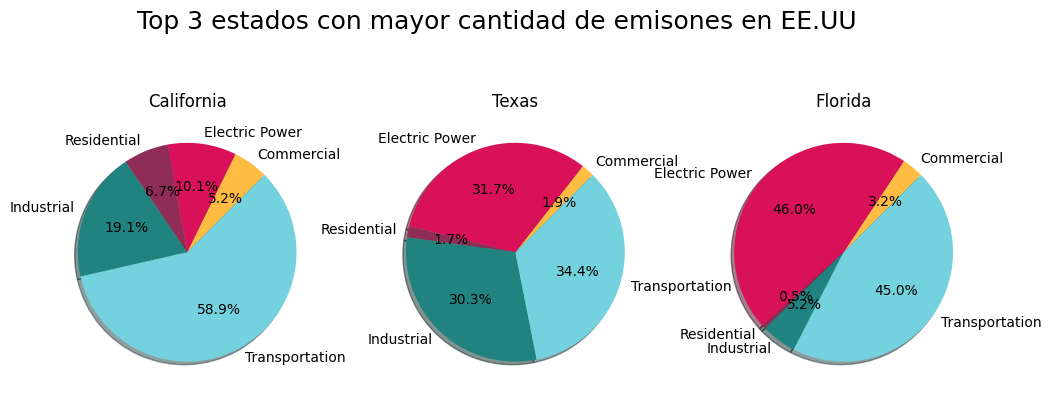

In [55]:
#primero de mayores emisiones
new_df = data.loc[['California', 'Texas', 'Florida']]
new_df.drop(['Total'], axis = 'columns', inplace = True)

colours = ['#ffbc42', '#d81159','#8f2d56','#218380','#73d2de']

                                                 #ancho y largo
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(12,5)) # Aquí vamos a definir el tamaño de la figura y cuántos gráficos van a haber
for ii, ax in enumerate(axs.flatten()): # Digamos que aqui se iteran los ejes de cada subplot
  plt.sca(ax) # Esto le indica al ciclo que en ese eje se haga cierta figura
  plt.pie(new_df.iloc[ii], labels = new_df.columns, startangle = 45, colors = colours, autopct = '%1.1f%%', shadow = True);
  plt.title(new_df.index[ii])

plt.suptitle('Top 3 estados con mayor cantidad de emisones en EE.UU \n  ', fontsize=18)
print(new_df)



In [51]:
new_df2 = data['Total'].nsmallest(4)
print(new_df2)

State
District of Columbia     2.76
Vermont                  5.95
Rhode Island             9.75
Delaware                13.31
Name: Total, dtype: float64


                      Commercial  Electric Power  Residential  Industrial  \
State                                                                       
District of Columbia        0.94            0.00         0.64        0.03   
Vermont                     0.85            0.00         1.30        0.42   
Rhode Island                0.86            2.57         1.81        0.63   

                      Transportation  
State                                 
District of Columbia            1.15  
Vermont                         3.37  
Rhode Island                    3.87  


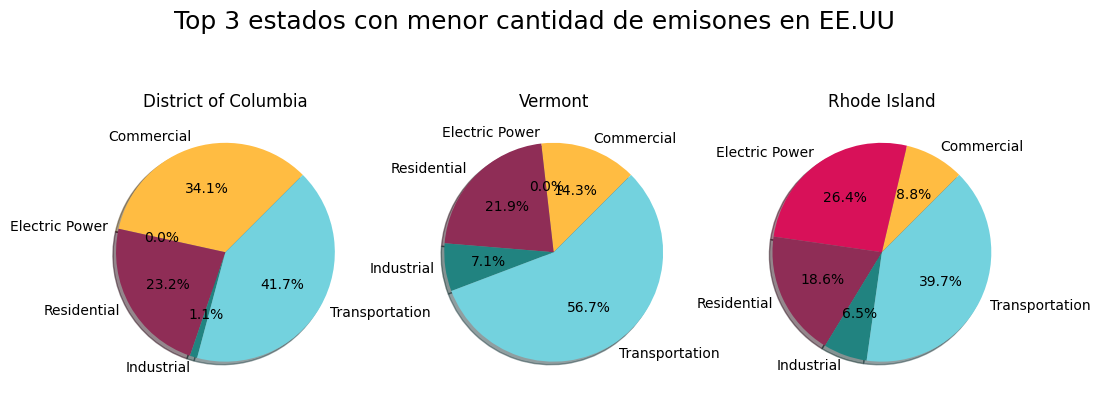

In [56]:
#primero de menores emisiones
new_df2 = data.loc[['District of Columbia', 'Vermont', 'Rhode Island']]
new_df2.drop(['Total'], axis = 'columns', inplace = True)

colours = ['#ffbc42', '#d81159','#8f2d56','#218380','#73d2de']

                                                 #ancho y largo
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(12,5)) # Aquí vamos a definir el tamaño de la figura y cuántos gráficos van a haber
for ii, ax in enumerate(axs.flatten()): # Digamos que aqui se iteran los ejes de cada subplot
  plt.sca(ax) # Esto le indica al ciclo que en ese eje se haga cierta figura
  plt.pie(new_df2.iloc[ii], labels = new_df2.columns, startangle = 45, colors = colours, autopct = '%1.1f%%', shadow = True);
  plt.title(new_df2.index[ii])

plt.suptitle('Top 3 estados con menor cantidad de emisones en EE.UU \n  ', fontsize=18)
print(new_df2)

In [58]:
print(data['Transportation'].mean())


72.77519230769232


In [66]:
df_new = data[data['Transportation'] > 72.77]
print(df_new)

#df_new = data[data['Transportation'] > data['Transportation'].mean()]

            Commercial  Electric Power  Residential  Industrial  \
State                                                             
California       18.87           36.57        24.11       68.84   
Florida           7.34          105.90         1.19       12.03   
New York         21.65           27.74        30.59        8.30   
Texas            12.63          207.54        10.79      198.03   
Total           233.38         1796.47       298.56      940.43   

            Transportation    Total  
State                                
California          212.95   361.35  
Florida             103.60   230.06  
New York             75.38   163.66  
Texas               224.82   653.82  
Total              1892.15  5160.99  


In [67]:
df_new.drop(['Total'], axis = 'columns', inplace = True)

<ipython-input-67-eeaff09b7bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Total'], axis = 'columns', inplace = True)


            Commercial  Electric Power  Residential  Industrial  \
State                                                             
California       18.87           36.57        24.11       68.84   
Florida           7.34          105.90         1.19       12.03   
New York         21.65           27.74        30.59        8.30   
Texas            12.63          207.54        10.79      198.03   
Total           233.38         1796.47       298.56      940.43   

            Transportation  
State                       
California          212.95  
Florida             103.60  
New York             75.38  
Texas               224.82  
Total              1892.15  


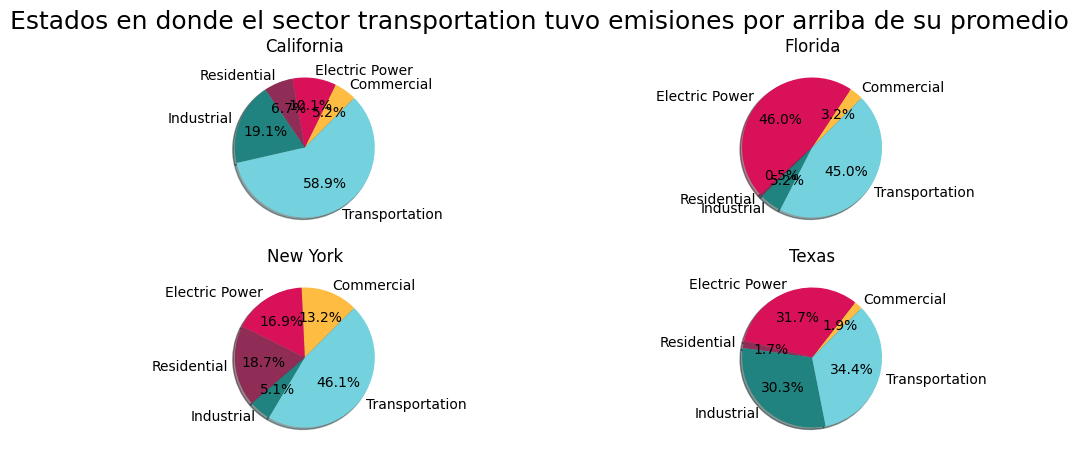

In [68]:
colours = ['#ffbc42', '#d81159','#8f2d56','#218380','#73d2de']

                                                 #ancho y largo
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12,5)) # Aquí vamos a definir el tamaño de la figura y cuántos gráficos van a haber
for ii, ax in enumerate(axs.flatten()): # Digamos que aqui se iteran los ejes de cada subplot
  plt.sca(ax) # Esto le indica al ciclo que en ese eje se haga cierta figura
  plt.pie(df_new.iloc[ii], labels = df_new.columns, startangle = 45, colors = colours, autopct = '%1.1f%%', shadow = True);
  plt.title(df_new.index[ii])

plt.suptitle('Estados en donde el sector transportation tuvo emisiones por arriba de su promedio \n  ', fontsize=18)
print(df_new)

In [ ]:
#top3= data.sort_values(by='Total', ascending =False)[1:4]
#top3menores= data.sort_values(by='Total', ascending =True)[0:3]

#top3 = top3.iloc[:, 0:-1] para quitar la columna total
#top3menores = top3menores.iloc[:, 0:-1]

#graficar